In [22]:
%matplotlib inline
import pandas as pd
import datetime
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels
from matplotlib.pylab import style
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 
style.use('ggplot')   
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

In [23]:
stockFile = 'data2000_2021.csv'
stock = pd.read_csv(stockFile, index_col=0, parse_dates=[0])#将索引index设置为时间，parse_dates对日期格式处理为标准格式。
# stock.tail(600)

In [24]:
stock_week = stock['close'].resample('M').mean()
stock_train = stock_week['2000':'2018']

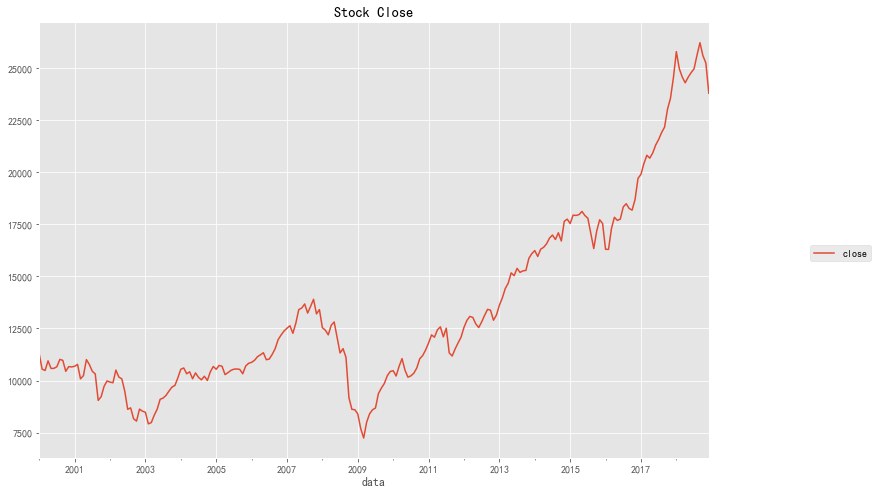

In [25]:
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock Close")
sns.despine()

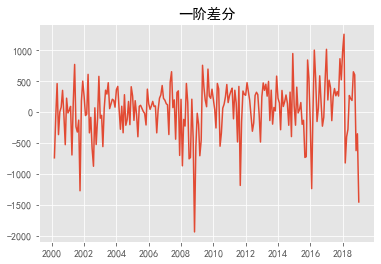

In [26]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()
plt.figure()
plt.plot(stock_diff)
plt.title('一阶差分')
plt.show()

<ipython-input-27-10649e98f6ce>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


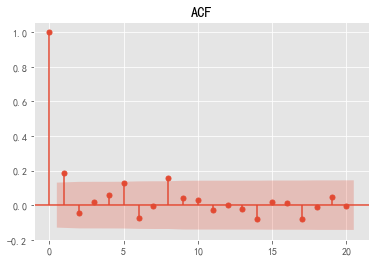

In [27]:
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
acf.show()

<ipython-input-28-8c0c864cf7a6>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pacf.show()


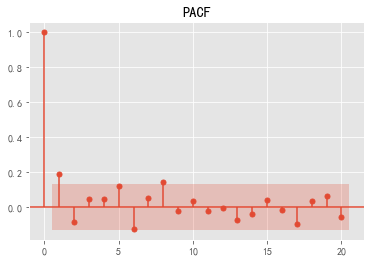

In [28]:
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
pacf.show()

In [29]:
model = statsmodels.tsa.arima_model.ARIMA(stock_train, order=(1, 1, 1),freq='M')
result = model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

In [33]:
pred = result.predict('20170601', '20250419',dynamic=True, typ='levels')#预测，指定起始与终止时间。预测值起始时间必须在原始数据中，终止时间不需要
print (pred)

TypeError: predict() got an unexpected keyword argument 'tye'

NameError: name 'pred' is not defined

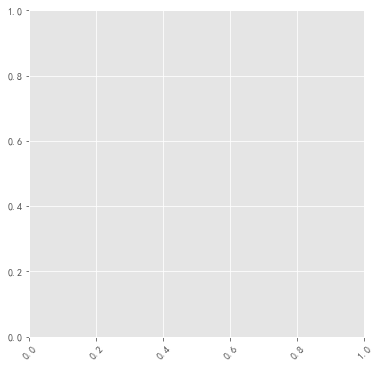

In [17]:
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)#[<matplotlib.lines.Line2D at 0x28025665278>]